In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [216]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [217]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [218]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## **EDA**

In [219]:
def Average_feature_crop(dataframe, feature_name, feature_title):
    grouped_data = dataframe.groupby("label")[feature_name].mean().reset_index()
    plt.figure(figsize=(15,8))
    fig = plt.gcf()
    fig.patch.set_facecolor('#121212')  
    plt.gca().set_facecolor('#1e1e1e')  
    sns.barplot(y=feature_name, x="label", data=grouped_data, palette="viridis")
    plt.xlabel("Crops", fontsize=15, color='white')
    for spine in plt.gca().spines.values():
        spine.set_color('white')
    plt.gca().tick_params(colors='white')
    plt.title(f"Average {feature_title} for Crops",fontsize=20, color='white')
    plt.ylabel(f"{feature_title}" , fontsize=15, color='white')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

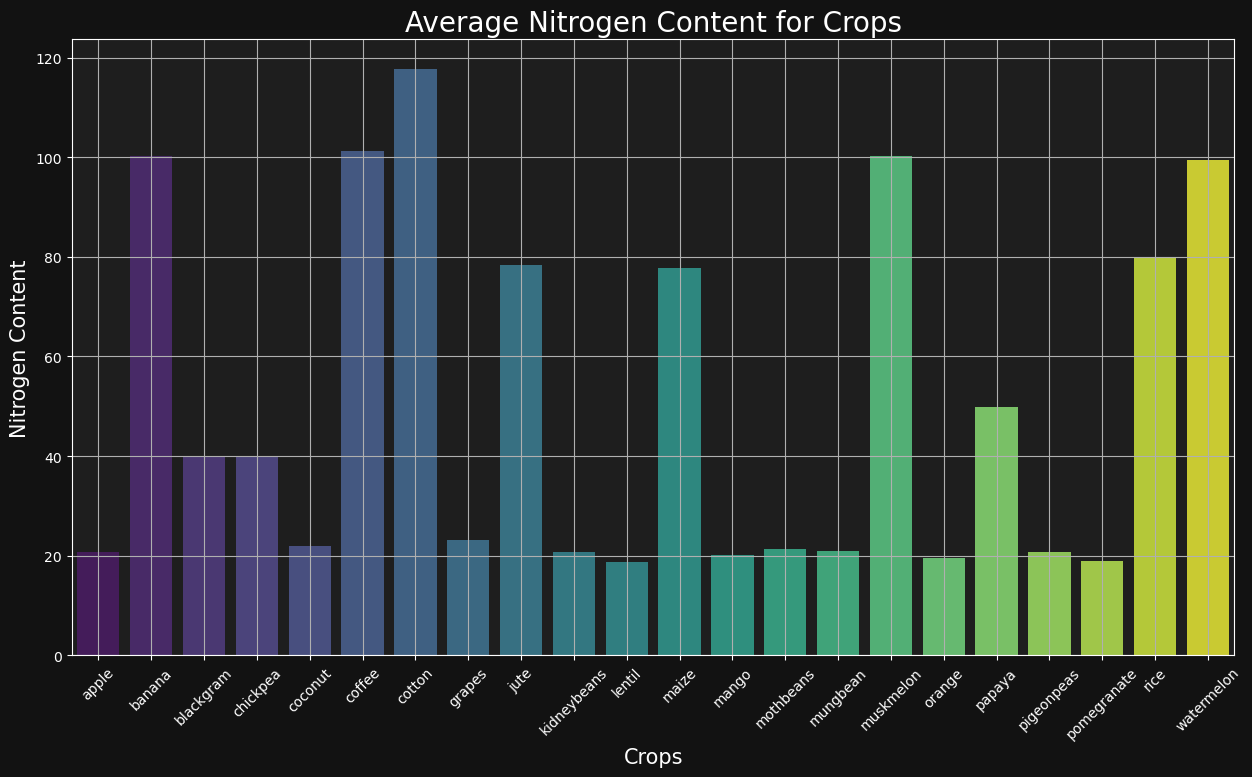

In [220]:
Average_feature_crop(df, "N", "Nitrogen Content")

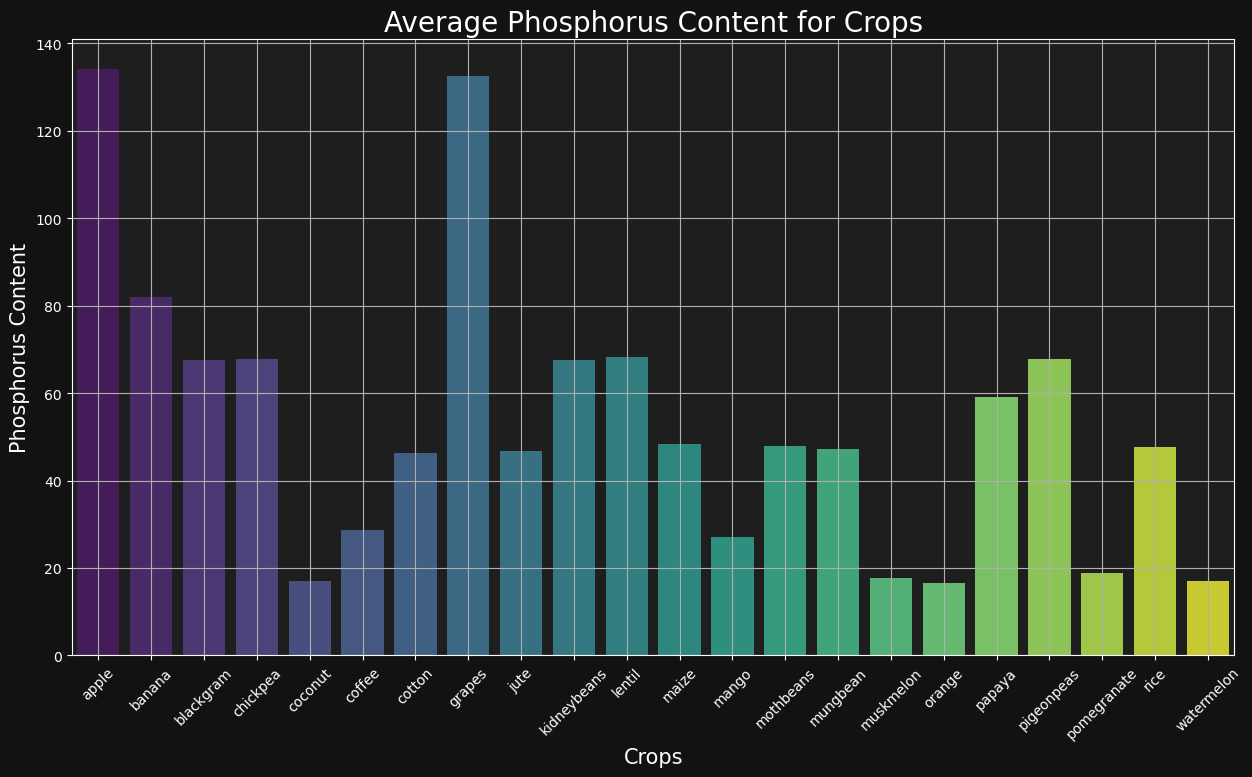

In [221]:
Average_feature_crop(df, "P", "Phosphorus Content")

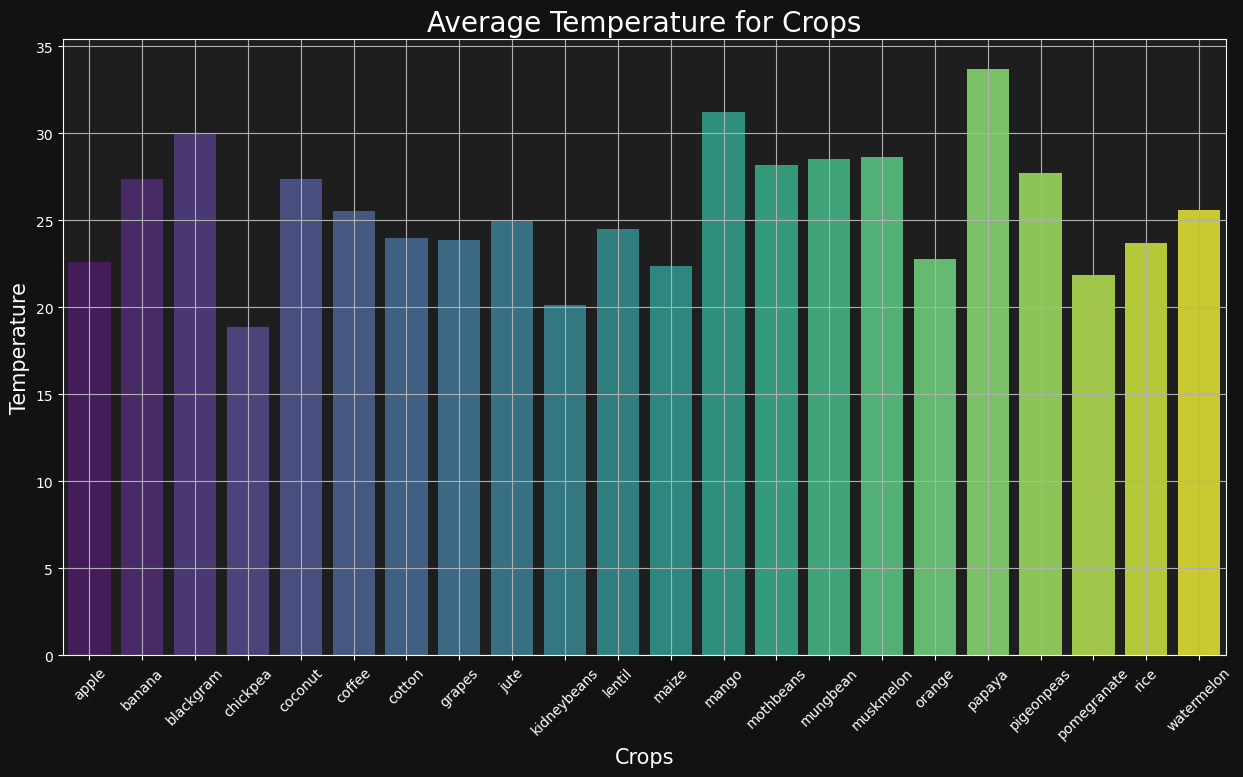

In [222]:
Average_feature_crop(df, "temperature", "Temperature")

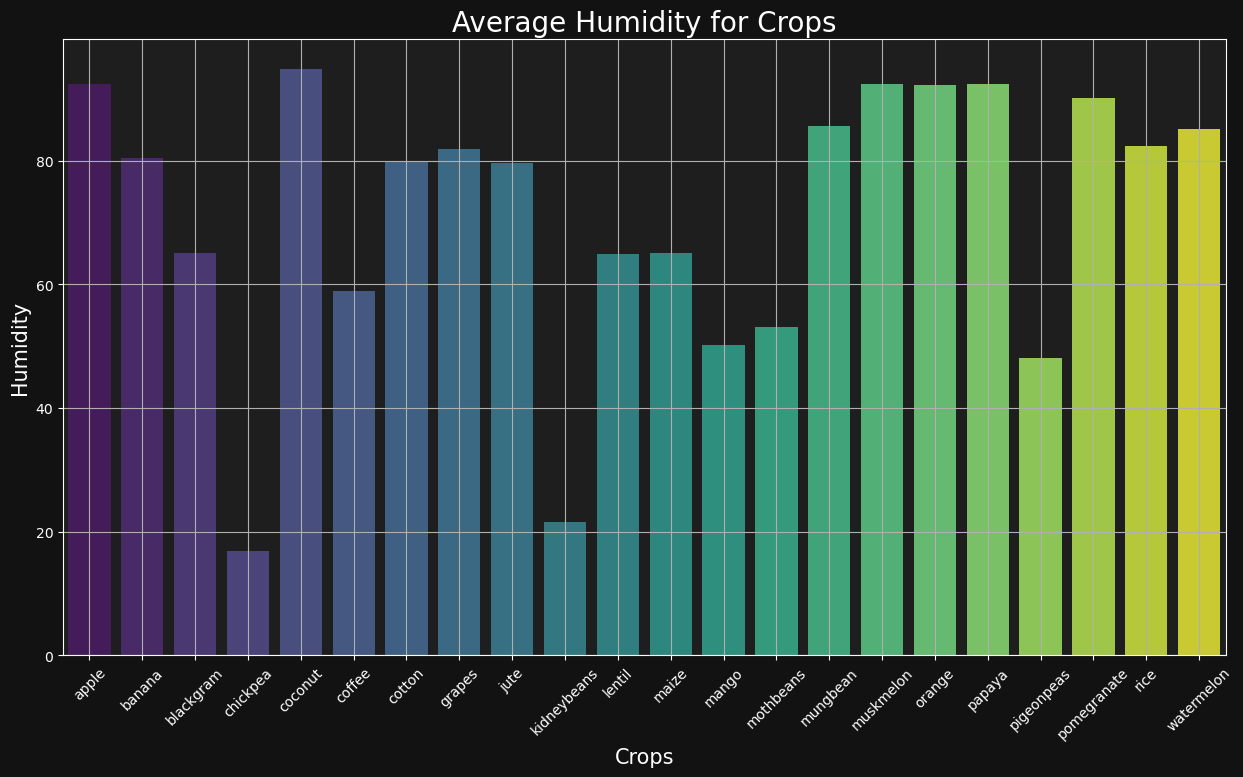

In [223]:
Average_feature_crop(df, "humidity", "Humidity")

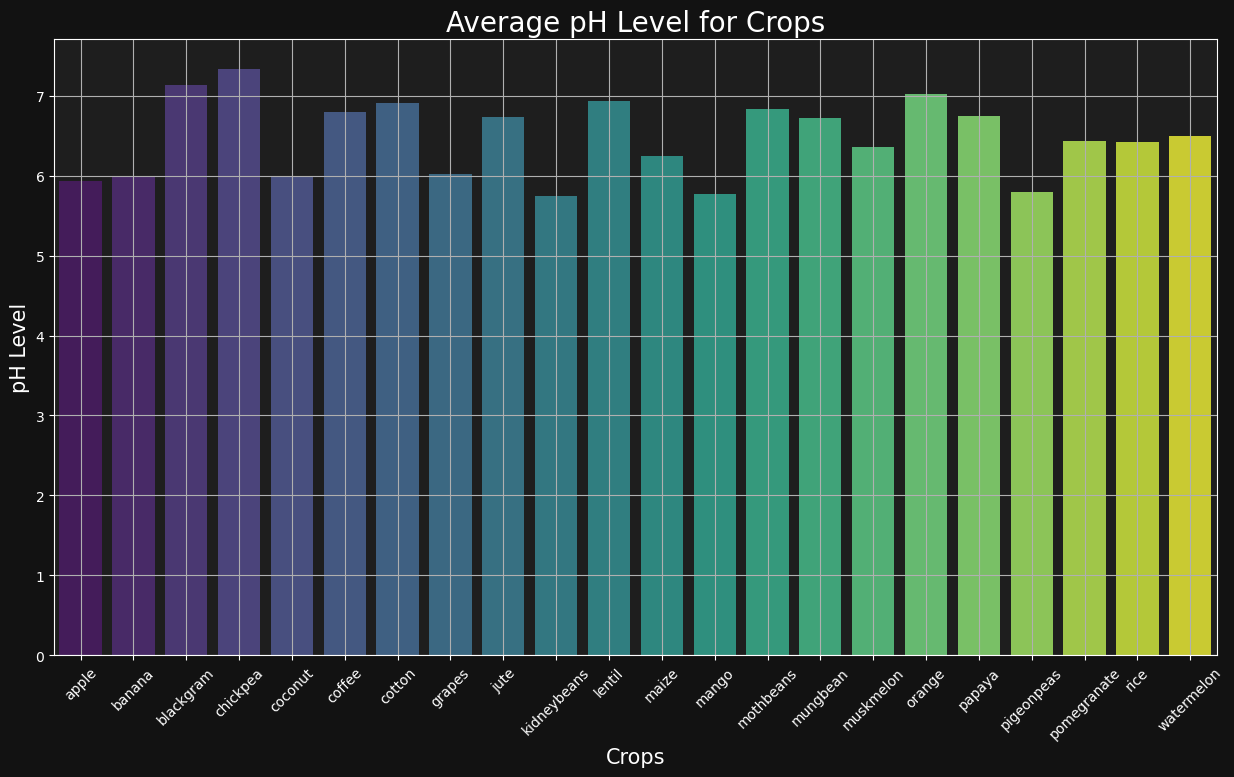

In [224]:
Average_feature_crop(df, 'ph', "pH Level")

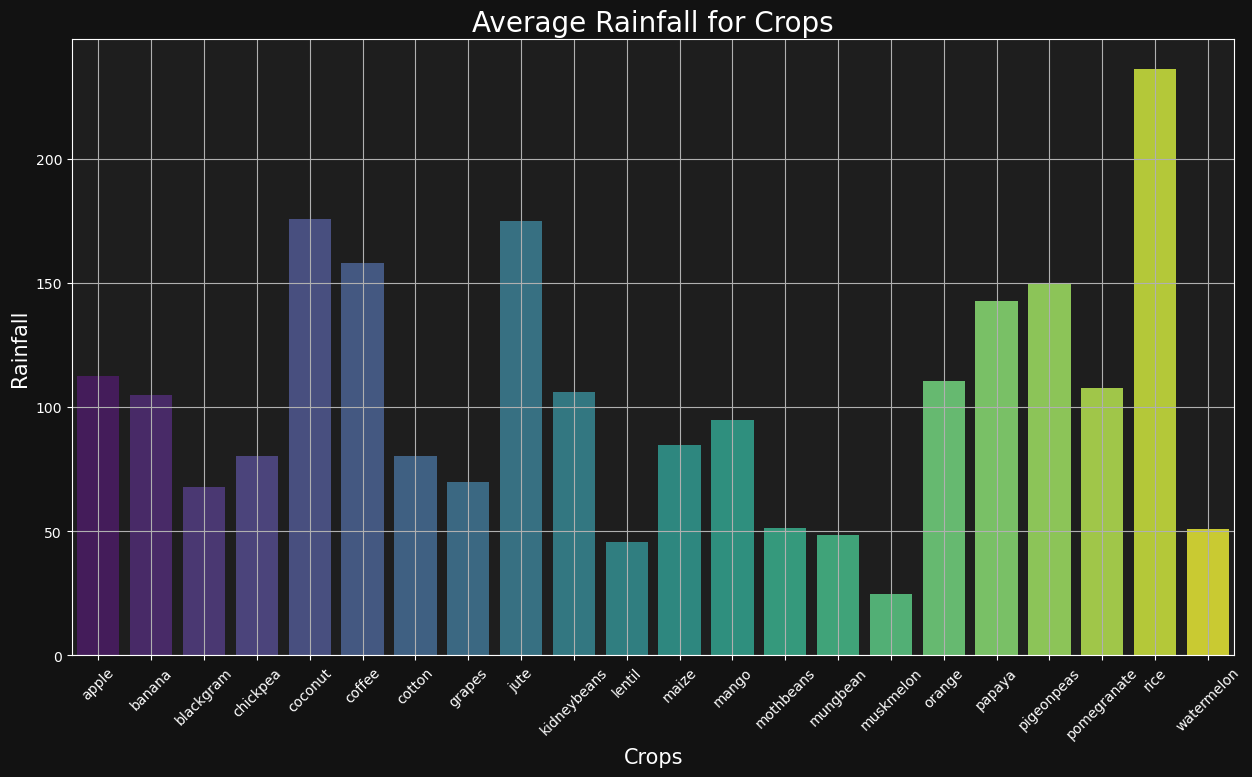

In [225]:
Average_feature_crop(df, "rainfall", "Rainfall")

In [226]:
# encoder = LabelEncoder()
# df['label'] = encoder.fit_transform(df['label'])

## **Model Training**

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [228]:
scale = StandardScaler()
X = df.drop('label', axis=1)
y = df['label']

x_scaled = scale.fit_transform(X)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [230]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [231]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))


Accuracy: 99.32


In [232]:
classification_report = classification_report(y_test, y_pred)

In [233]:
print(classification_report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [234]:
import pickle
with open("model.pkl","wb") as file:
    pickle.dump(model,file)

In [235]:
with open('model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [237]:
X_new=[[80,40,42,28,88,6.67,212]]
y_predi = clf.predict(X_new)
print("Predictions:", y_predi)

Predictions: ['apple']
